### Import packages

In [710]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [711]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Premier_league_match_details/'
file_list = os.listdir(path)

Premier_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Premier_matches = pd.concat([Premier_matches, pd.read_json(filepath, lines=True)], axis=0)

In [712]:
Premier_matches.head(5)

,match_general_info,team_details,event_details
0,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Tottenham Hotspur', 'rank':...","{'home': {'sub': [{'subs_in': 'Robbie Keane', ..."
1,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Aston Villa', 'rank': '3', ...",{'home': {'goal': [{'scorer': 'Stewart Downing...
2,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Blackburn Rovers', 'rank': ...",{'home': {'goal': [{'scorer': 'Nikola Kalinic'...
3,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Bolton Wanderers', 'rank': ...","{'home': {'card': [{'name': 'Fabrice Muamba', ..."
4,"{'day': 'Sat', 'date': '8/14/10', 'starttime':...","{'home': {'name': 'Sunderland AFC', 'rank': '7...","{'home': {'goal': [{'scorer': 'Darren Bent', '..."


In [713]:
print('number of matches from season 2010-2011:', len(Premier_matches))

number of matches from season 2010-2011: 4975


### Match general information analysis
#### 1. Observe initial form - Null value check

In [714]:
match_general_info = pd.DataFrame(Premier_matches['match_general_info'].to_list())

In [715]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Sat,8/14/10,1:45 PM,White Hart Lane,35.928,Andre Marriner,0:0
1,Sat,8/14/10,4:00 PM,Villa Park,36.604,Mike Dean,3:0
2,Sat,8/14/10,4:00 PM,Ewood Park,25.869,Phil Dowd,1:0
3,Sat,8/14/10,4:00 PM,University of Bolton Stadium,20.352,Stuart Attwell,0:0
4,Sat,8/14/10,4:00 PM,Stadium of Light,38.390,Anthony Taylor,2:2


In [716]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 0
stadium 0
attendance 458
referee 0
score 0


Attendance data need to be observed after string type date to datetype date to check why there are many null values.

#### 2. Data pre-processing

In [717]:
# match_general_info['attendance'] = match_general_info['attendance'].apply(lambda x: x.replace('.', ''))
# match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'])

def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [718]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Sat,2010-08-14,13:45:00,White Hart Lane,35.928,Andre Marriner,0:0,0,0
1,Sat,2010-08-14,16:00:00,Villa Park,36.604,Mike Dean,3:0,3,0
2,Sat,2010-08-14,16:00:00,Ewood Park,25.869,Phil Dowd,1:0,1,0
3,Sat,2010-08-14,16:00:00,University of Bolton Stadium,20.352,Stuart Attwell,0:0,0,0
4,Sat,2010-08-14,16:00:00,Stadium of Light,38.390,Anthony Taylor,2:2,2,2


In [719]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
3697,Wed,2020-06-17,19:00:00,Villa Park,None,Michael Oliver,0:0,0,0
3698,Wed,2020-06-17,21:15:00,Etihad Stadium,None,Anthony Taylor,3:0,3,0
3709,Fri,2020-06-19,19:00:00,Carrow Road,None,Kevin Friend,0:3,0,3
3710,Fri,2020-06-19,21:15:00,Tottenham Hotspur Stadium,None,Jonathan Moss,1:1,1,1
3711,Sat,2020-06-20,13:30:00,Vicarage Road,None,Craig Pawson,1:1,1,1
...,...,...,...,...,...,...,...,...,...
4536,Sun,2022-05-08,15:00:00,Carrow Road,None,Robert Jones,0:4,0,4
4965,Fri,2023-09-01,21:00:00,Kenilworth Road,None,Paul Tierney,1:2,1,2
4971,Sat,2023-09-02,18:30:00,AMEX Stadium,None,Stuart Attwell,3:1,3,1
4972,Sun,2023-09-03,15:00:00,Selhurst Park,None,Robert Jones,3:2,3,2


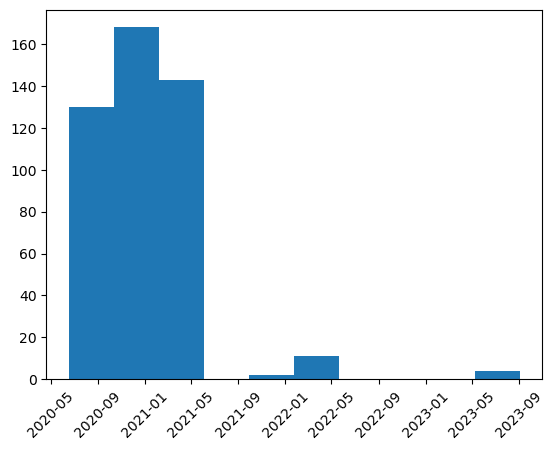

In [720]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most of null cases for the attendance locate season 2020-2021, and it could be because of the pendemic. <br>
There were many games with no attendance during the pendamic, so 0 will replace null values for attendance. <br>
For other cases, average number of attendance for the stadium will replace null values.

In [721]:
match_general_info.loc[match_general_info['date']<='2021-07-01', 'attendance'] = match_general_info[match_general_info['date']<='2021-07-01']['attendance'].fillna('0')

In [722]:
match_general_info[match_general_info['attendance'].isnull()]['stadium']

4374    Gtech Community Stadium
4404          St Mary's Stadium
4413                Carrow Road
4416                 Villa Park
4431                 Villa Park
4437                Elland Road
4463          St Mary's Stadium
4469           Molineux Stadium
4490          St Mary's Stadium
4506           Molineux Stadium
4520          St Mary's Stadium
4529                  Turf Moor
4536                Carrow Road
4965            Kenilworth Road
4971               AMEX Stadium
4972              Selhurst Park
4973                    Anfield
Name: stadium, dtype: object

In [723]:
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

In [724]:
attendance_missing_index

Int64Index([4374, 4404, 4413, 4416, 4431, 4437, 4463, 4469, 4490, 4506, 4520,
            4529, 4536, 4965, 4971, 4972, 4973],
           dtype='int64')

In [725]:
for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(round(average))
    
    else:
        # max capacity of Kenilworth Road stadium (nothing left after drop null value)
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(11500) 

In [740]:
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['attendance'])

16997
27062
25608
32140
32140
24212
27062
24425
27062
24425
27062
16721
25608
11500
24500
21872
44070


In [727]:
match_general_info['attendance'].isnull().sum()

0

#### 3. Data Quality Check - categorical data
##### (1) Check if there are inappropriate values.

In [728]:
match_general_info['day'].value_counts(dropna=False)

Sat    2621
Sun    1219
Wed     390
Mon     291
Tue     265
Thu      99
Fri      90
Name: day, dtype: int64

In [729]:
match_general_info['date'].value_counts(dropna=False)

2020-07-26    10
2015-12-26    10
2012-05-13    10
2021-05-23    10
2013-05-19    10
              ..
2015-12-14     1
2018-08-10     1
2020-12-30     1
2013-03-03     1
2013-09-15     1
Name: date, Length: 1422, dtype: int64

In [730]:
match_general_info['starttime'].value_counts(dropna=False)

16:00:00    2086
21:00:00     501
18:30:00     393
20:45:00     315
17:00:00     299
13:30:00     212
14:30:00     209
15:00:00     191
17:30:00     170
13:45:00     157
13:00:00      79
19:00:00      74
21:15:00      66
20:30:00      56
15:05:00      45
15:15:00      37
20:15:00      19
20:00:00      15
17:15:00      14
17:10:00      14
16:05:00       6
18:15:00       5
14:00:00       3
21:30:00       2
18:00:00       1
21:45:00       1
14:35:00       1
17:05:00       1
15:30:00       1
18:45:00       1
13:05:00       1
Name: starttime, dtype: int64

In [731]:
match_general_info['stadium'].value_counts(dropna=False)

Stamford Bridge                 250
Old Trafford                    249
Emirates Stadium                249
Goodison Park                   249
Anfield                         248
Etihad Stadium                  247
St James' Park                  230
St Mary's Stadium               209
Selhurst Park                   192
Villa Park                      191
King Power Stadium              171
The Hawthorns                   171
bet365 Stadium                  152
Turf Moor                       136
Craven Cottage                  134
Molineux Stadium                134
London Stadium                  134
White Hart Lane                 133
Swansea.com Stadium             133
Stadium of Light                133
AMEX Stadium                    117
Vitality Stadium                116
Vicarage Road                   114
Carrow Road                     113
Boleyn Ground                    95
Tottenham Hotspur Stadium        82
Loftus Road Stadium              57
DW Stadium                  

In [732]:
match_general_info['referee'].value_counts(dropna=False)

Michael Oliver       350
Anthony Taylor       346
Mike Dean            338
Martin Atkinson      333
Andre Marriner       305
Jonathan Moss        274
Kevin Friend         260
Craig Pawson         230
Lee Mason            228
Mark Clattenburg     174
Mike Jones           170
Stuart Attwell       165
Paul Tierney         159
Lee Probert          136
Neil Swarbrick       132
Phil Dowd            131
Chris Kavanagh       119
Howard Webb          119
Chris Foy            110
Graham Scott         101
Bobby Madley          94
David Coote           92
Roger East            90
Simon Hooper          79
Andrew Madley         73
Peter Bankes          63
Mark Halsey           60
Robert Jones          52
Darren England        46
Peter Walton          42
Jarred Gillett        27
John Brooks           26
Michael Salisbury     19
Thomas Bramall         9
Tony Harrington        9
Darren Bond            5
Tim Robinson           5
Keith Stroud           3
Josh Smith             1
Name: referee, dtype: int

In [733]:
match_general_info['score'].value_counts(dropna=False)

1:1    531
1:0    495
2:1    407
2:0    393
0:0    354
1:2    349
0:1    344
2:2    258
3:1    235
0:2    233
3:0    217
1:3    148
0:3    141
3:2    109
2:3    106
4:0    102
4:1     85
1:4     57
3:3     53
0:4     52
5:0     46
4:2     39
5:1     27
2:4     26
4:3     22
1:5     18
0:5     17
6:0     12
5:2     11
2:5     11
6:1     11
3:4     10
1:6      6
5:3      6
0:6      5
6:2      4
7:0      4
6:3      4
4:4      4
8:0      3
5:4      2
7:2      2
3:6      2
7:1      2
3:5      2
9:0      2
5:5      1
7:3      1
4:5      1
1:7      1
8:2      1
2:6      1
0:9      1
0:7      1
Name: score, dtype: int64

##### (2) Null value check

In [734]:
match_general_info.apply(lambda x: x.isnull().sum())

day           0
date          0
starttime     0
stadium       0
attendance    0
referee       0
score         0
home_score    0
away_score    0
dtype: int64

In [735]:
match_general_info[['home_score', 'away_score']].apply(pd.Series.value_counts)

,home_score,away_score
0,1148,1628.0
1,1605,1642.0
2,1202,1006.0
3,628,481.0
4,253,151.0
5,93,50.0
6,31,14.0
7,9,2.0
8,4,NaN
9,2,1.0


In [736]:
match_general_info.describe()

,home_score,away_score
count,4975.000000,4975.000000
mean,1.541508,1.217688
std,1.314236,1.183525
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,9.000000


In [737]:
a = pd.Series(['a', 'b', None])

In [738]:
a.value_counts(dropna=False)

a       1
b       1
None    1
dtype: int64